[x] диаграмма важности признаков (gain_ratio) 3 преза последний слайд

[x] гистограмма распределений значений

[x] корреляции - тепловая карта признаков

[x] высокий процент пропущенных значений

[x] количество уникальных значений

https://www.youtube.com/watch?v=iGFdh6_FePU


https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

In [213]:
# импорты и загрузка
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from google.colab import files

import seaborn as sns
import matplotlib.pyplot as plt

import os

def uploadddd():
  uploaded = files.upload()

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    
if not os.path.isfile('ID_data_mass_18122012.xlsx'):
  uploadddd()

In [214]:
# открытие и NaNирование
df = pd.read_excel('ID_data_mass_18122012.xlsx', skiprows=[0, 2], sheet_name="VU")
df = df.replace('-', np.NaN)
df = df.replace(r'^[a-zA-Zа-яА-Я\s]*$', np.NaN, regex=True)
# print("before " + df['Unnamed: 1'].dtype.name)
# df['Unnamed: 1'] = pd.to_datetime(df['Unnamed: 1'], errors='coerce', format='%Y-%m-%d')
df.drop(columns=["Unnamed: 1"], inplace=True)

df = df.replace('40,1,', 40.1) 

pd.set_option('display.max_rows', df.shape[0]+1)

In [215]:
# fix KGF
def kgf_fix(row):
  return row["КГФ"] if not math.isnan(row["КГФ"]) else row["КГФ.1"]*1000
df["КГФ-2-in-1"] = df.apply(lambda row: kgf_fix(row), axis=1)

df.drop(columns=["КГФ", "КГФ.1"], inplace=True)

In [216]:
# delete 2 nan in target rows
index = list((~(df['G_total'].isnull() & df["КГФ-2-in-1"].isnull())).array)
df = df.loc[index]
df.reset_index(inplace=True)


In [217]:
# G_total to bool
def g_total_fix(row):
  return 0 if math.isnan(row["G_total"]) else 1
df["G_total_bool"] = df.apply(lambda row: g_total_fix(row), axis=1)
df.drop(columns=["G_total"], inplace=True)

In [218]:
# searching missing persent
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

to_skip = ["G_total_bool", "КГФ-2-in-1"]
missing_value_df = missing_value_df[missing_value_df['column_name'].map(lambda x: x not in to_skip)]

missing_value_df

,column_name,percent_missing
index,index,0.000000
Unnamed: 0,Unnamed: 0,0.000000
Глубина манометра,Глубина манометра,3.225806
Dшт,Dшт,0.000000
Руст,Руст,0.000000
Рзаб,Рзаб,3.225806
Pлин,Pлин,0.000000
Руст.1,Руст.1,0.000000
Рзаб.1,Рзаб.1,3.225806
Рлин,Рлин,0.000000


In [219]:
#remove 60
to_remove = missing_value_df.loc[(missing_value_df['percent_missing'] > 60), 'column_name']
print(to_remove)

def remove_more_then_60_persent(df):
  df = df.drop(columns=to_remove.values)
  print(str(df.columns) + "; размер:" + str(len(df.columns)))
  return df

print(str(df.columns) + "; размер:" + str(len(df.columns)))

df = remove_more_then_60_persent(df)


Ro_g    Ro_g
Ro_w    Ro_w
Name: column_name, dtype: object
Index(['index', 'Unnamed: 0', 'Глубина манометра', 'Dшт', 'Руст', 'Рзаб',
       'Pлин', 'Руст.1', 'Рзаб.1', 'Рлин', 'Туст', 'Тна шлейфе', 'Тзаб',
       'Tлин', 'Дебит газа', 'Дебит ст. конд.', 'Дебит воды', 'Дебит смеси',
       'Дебит гааз', 'Дебит кон нестабильный', 'Дебит воды.1', 'Нэф',
       'Рпл. Тек (послед точка на КВД)', 'Рпл. Тек (Расчет по КВД)',
       'Рпл. Тек (Карноухов)', 'Pсб', 'Pсб.1', 'Ro_g', 'Ro_c', 'Ro_w',
       'Удельная плотность газа ', 'КГФ-2-in-1', 'G_total_bool'],
      dtype='object'); размер:33
Index(['index', 'Unnamed: 0', 'Глубина манометра', 'Dшт', 'Руст', 'Рзаб',
       'Pлин', 'Руст.1', 'Рзаб.1', 'Рлин', 'Туст', 'Тна шлейфе', 'Тзаб',
       'Tлин', 'Дебит газа', 'Дебит ст. конд.', 'Дебит воды', 'Дебит смеси',
       'Дебит гааз', 'Дебит кон нестабильный', 'Дебит воды.1', 'Нэф',
       'Рпл. Тек (послед точка на КВД)', 'Рпл. Тек (Расчет по КВД)',
       'Рпл. Тек (Карноухов)', 'Pсб', 'Pсб.1'

In [220]:
# replalce 30 to median
to_replace = missing_value_df.loc[(missing_value_df['percent_missing'] <= 60) & (missing_value_df['percent_missing'] > 0), 'column_name']
print(to_replace)

def replace_to_median(df):
  for column in to_replace.values:
    median = df[column].median()
    df[column].fillna(median, inplace = True) 
    print(str(column) + " " + str(median))

  print(str(df.columns) + "; размер:" + str(len(df.columns)))
  return df

df = replace_to_median(df)

print(str(df.columns) + "; размер:" + str(len(df.columns)))

Глубина манометра                              Глубина манометра
Рзаб                                                        Рзаб
Рзаб.1                                                    Рзаб.1
Тна шлейфе                                            Тна шлейфе
Тзаб                                                        Тзаб
Дебит смеси                                          Дебит смеси
Рпл. Тек (послед точка на КВД)    Рпл. Тек (послед точка на КВД)
Рпл. Тек (Расчет по КВД)                Рпл. Тек (Расчет по КВД)
Рпл. Тек (Карноухов)                        Рпл. Тек (Карноухов)
Name: column_name, dtype: object
Глубина манометра 3579.0
Рзаб 337.78917249999995
Рзаб.1 334.25
Тна шлейфе 38.7
Тзаб 105.11
Дебит смеси 401.391396884157
Рпл. Тек (послед точка на КВД) 39.466049999999996
Рпл. Тек (Расчет по КВД) 50.8
Рпл. Тек (Карноухов) 50.9
Index(['index', 'Unnamed: 0', 'Глубина манометра', 'Dшт', 'Руст', 'Рзаб',
       'Pлин', 'Руст.1', 'Рзаб.1', 'Рлин', 'Туст', 'Тна шлейфе', 'Тзаб',
       'T

In [221]:
# corr table
df.corr(method='pearson')[df.corr(method='pearson').abs() > 0.95]

,index,Unnamed: 0,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_c,Удельная плотность газа,КГФ-2-in-1,G_total_bool
index,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Глубина манометра,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dшт,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Руст,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.999288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Рзаб,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.977881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pлин,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Руст.1,NaN,NaN,NaN,NaN,0.999288,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Рзаб.1,NaN,NaN,NaN,NaN,NaN,0.977881,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Рлин,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


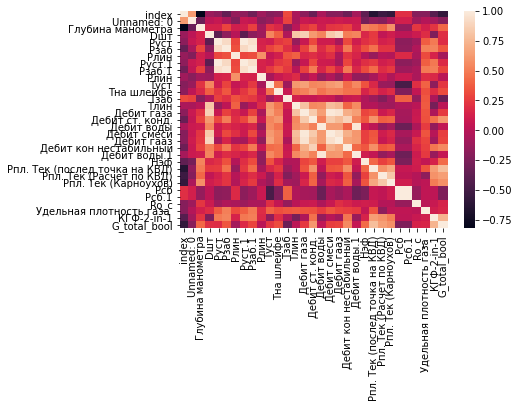

In [222]:

# corr table hotmap
# df.corr(method='pearson')[df.corr(method='pearson') > 0.95]
import seaborn as sns
%matplotlib inline
corr = df.corr(method='pearson')

# fig, ax = plt.subplots()
# fig.set_size_inches(10,10)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [223]:
# find and delete columns with abs(corr)>0.95 

# MANUAL
# df.drop(['Руст.1', 'Рзаб.1', 'Дебит смеси', 'Дебит гааз', 'Дебит воды.1', 'Pсб.1'], axis=1, inplace=True)

# AUTO
corr_dict = {}

for x in corr:
  for y in corr[x].index:
    local_corr = corr[x][y]

    if np.isnan(local_corr) or local_corr is np.NaN or local_corr is None:
      continue

    if abs(local_corr) < 0.95:
      continue

    if x == y:
      continue

    # str = f'{x}:{y} = {local_corr}'
    # print(str)

    if y in corr_dict and x in corr_dict[y]:
      #print('piu')
      continue

    if x in corr_dict:
      corr_dict[x].append(y)
    else:
      corr_dict[x] = [y]

corr_dict
print(corr_dict)
dublicate_columns = []
for key, value in corr_dict.items():
  dublicate_columns.extend(value)
dublicate_columns = list(set(dublicate_columns)) # clear dublicates
dublicate_columns = list(set(dublicate_columns) - set(to_skip))
print(f'columns with abs(corr) > 0.95 found {dublicate_columns}')
# df.drop(dublicate_columns, axis=1, inplace=True)

{'Руст': ['Руст.1'], 'Рзаб': ['Рзаб.1'], 'Дебит газа': ['Дебит смеси', 'Дебит гааз'], 'Дебит воды': ['Дебит воды.1'], 'Pсб': ['Pсб.1']}
columns with abs(corr) > 0.95 found ['Pсб.1', 'Дебит смеси', 'Дебит воды.1', 'Дебит гааз', 'Рзаб.1', 'Руст.1']


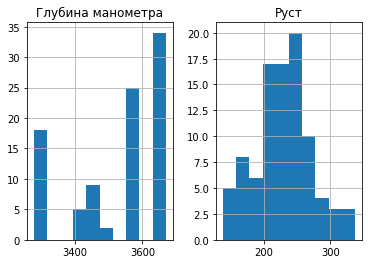

In [224]:
# draw hist

hist = df.hist(column=['Глубина манометра', 'Руст']) # можно отобразить любые, написав их в список
# pic = hist.get_figure() # тут в коллабе у меня ошибка, но все-равно выводится
# pic


In [225]:
# upload df to PC
# df.to_csv('df.csv')
# files.download('df.csv')

In [226]:
("ga" + "v ") * 20

'gav gav gav gav gav gav gav gav gav gav gav gav gav gav gav gav gav gav gav gav '

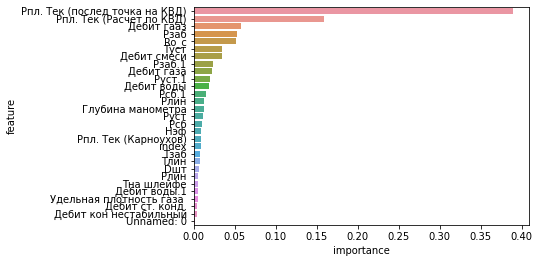

In [227]:
X =  df.drop(to_skip, axis=1)
y = df[to_skip]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

features = {}
for feature, importance in zip(X.columns, reg.feature_importances_): 
  features[feature] = importance

importances = pd.DataFrame({'feature': features.keys(),
                            'importance': features.values()})
importances.sort_values(by=['importance'], inplace=True, ascending=False)
importances
sns.barplot(x = importances['importance'], y = importances['feature'], 
            data=importances)


In [228]:
#show unique count
nunique = list(map(lambda x: df[x].nunique(), df))
unique = pd.DataFrame({'column_name': df.columns,
                       'nunique': nunique})
unique

,column_name,nunique
0,index,93
1,Unnamed: 0,8
2,Глубина манометра,20
3,Dшт,10
4,Руст,87
5,Рзаб,89
6,Pлин,91
7,Руст.1,73
8,Рзаб.1,90
9,Рлин,88


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           93 non-null     int64  
 1   Unnamed: 0                      93 non-null     int64  
 2   Глубина манометра               93 non-null     float64
 3   Dшт                             93 non-null     float64
 4   Руст                            93 non-null     float64
 5   Рзаб                            93 non-null     float64
 6   Pлин                            93 non-null     float64
 7   Руст.1                          93 non-null     float64
 8   Рзаб.1                          93 non-null     float64
 9   Рлин                            93 non-null     float64
 10  Туст                            93 non-null     float64
 11  Тна шлейфе                      93 non-null     float64
 12  Тзаб                            93 non

In [229]:
df

,index,Unnamed: 0,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_c,Удельная плотность газа,КГФ-2-in-1,G_total_bool
0,0,804,3576.3,7.94,249.600000,370.100000,101.800000,249.000000,359.60,101.800000,53.0,31.7,103.200,32.500000,214.704000,83.600000,0.400000,231.248840,1610.368866,131.3,0.4,56.8000,45.25000,56.5000,50.9,93.6,92.376018,801.00,0.669449,311.909400,1
1,1,804,3576.3,9.53,233.500000,364.600000,101.300000,231.000000,338.10,102.400000,58.8,37.6,103.000,38.600000,290.594000,104.700000,1.400000,309.001660,2310.226429,158.5,1.4,56.8000,45.25000,56.5000,50.9,92.9,91.685171,801.00,0.669449,288.600300,1
2,2,804,3576.3,11.11,213.400000,357.100000,101.600000,211.000000,314.80,100.600000,63.6,42.8,102.600,43.400000,368.042000,114.300000,1.900000,388.114980,3039.489680,172.3,1.9,56.8000,45.25000,56.5000,50.9,91.4,90.204787,801.00,0.669449,248.790600,1
3,3,804,3576.3,12.70,191.600000,347.400000,98.400000,187.000000,291.50,99.000000,64.7,46.2,102.000,46.100000,434.663000,121.300000,3.300000,455.214520,3824.082686,181.5,3.3,56.8000,45.25000,56.5000,50.9,89.2,88.033555,801.00,0.669449,223.559100,1
4,4,804,3576.3,14.29,171.900000,337.700000,99.200000,169.000000,270.30,99.500000,64.0,49.4,104.400,49.900000,483.283000,129.800000,4.600000,504.587780,4299.104676,190.6,4.7,56.8000,45.25000,56.5000,50.9,89.7,88.527017,801.00,0.669449,215.148600,1
5,5,804,3576.3,9.53,199.500000,286.400000,106.361669,199.500000,286.60,106.190000,57.5,38.8,102.640,38.979712,251.700000,76.800000,0.600000,268.896120,1921.000000,119.0,0.6,56.8000,41.22431,48.3000,50.9,90.7,89.513940,789.80,0.675000,241.130794,1
6,10,807,3667.0,7.94,252.000000,354.333525,102.932004,252.000000,354.20,101.565484,56.0,38.7,105.300,32.997275,234.857429,56.068587,0.000000,261.281260,1807.400000,90.4,0.0,57.2000,38.74000,50.8596,50.1,100.9,99.580558,787.00,0.659000,188.000000,0
7,11,807,3667.0,9.53,250.000000,350.200000,103.186902,250.000000,349.10,103.322581,61.0,38.7,105.200,39.060921,326.224449,73.887158,0.000000,362.084737,2532.400000,118.0,0.0,57.2000,38.74000,50.8596,50.1,100.1,98.791019,787.00,0.659000,178.000000,0
8,12,807,3667.0,11.11,240.000000,344.000000,105.671499,240.000000,344.10,105.588710,65.0,38.7,105.200,44.896592,429.722850,92.126725,1.014583,476.204797,3392.300000,146.0,1.0,57.2000,38.74000,50.8596,50.1,102.0,100.666173,787.00,0.659000,169.000000,0
9,13,807,3667.0,12.70,228.000000,336.700000,108.100063,228.000000,343.00,108.144839,42.0,38.7,105.100,49.839872,532.283025,109.812176,1.378418,589.142653,4228.800000,175.5,1.4,57.2000,38.74000,50.8596,50.1,103.8,102.442635,787.00,0.659000,162.000000,0
